Felipe Wendling Heidenfelder -
02/10/2022 - 
Case Caesars Entertainment


<center><h1 style="font-size:30px;"> Análise das bases adquiridas no Scraper</h1></center>

In [1208]:
# Importar as bibliotecas para as análises

import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib
import datetime
import seaborn as sns
import os
import numpy as np

import warnings
warnings.filterwarnings("ignore")

os.chdir(r"C:\Users\gust\Desktop\Case Gauss Capital\Hotéis")  # Define o diretório atual como sendo a pasta das bases de dados


# Salva cada base como um DataFrame em uma variável

df1 = pd.read_csv("Caesars_base.csv").drop("Unnamed: 0", 1)
df2 = pd.read_csv("Main_Street_Casino_Brewery_base.csv").drop("Unnamed: 0", 1)
df3 = pd.read_csv("Wynn_Las_Vegas_base.csv").drop("Unnamed: 0", 1)
df4 = pd.read_csv("OYO_Casino_base.csv").drop("Unnamed: 0", 1)
df5 = pd.read_csv("Hilton_Grand_base.csv").drop("Unnamed: 0", 1)
df6 = pd.read_csv("Silverton_Casino_Hotel_base.csv").drop("Unnamed: 0", 1)  
df7 = pd.read_csv("Tuscany_Suites_Casino_base.csv").drop("Unnamed: 0", 1)
df8 = pd.read_csv("Gold_Coast_Hotel_Casino_base.csv").drop("Unnamed: 0", 1)
df9 = pd.read_csv("The_Orleans_Hotel_Casino_base.csv").drop("Unnamed: 0", 1)
df10 = pd.read_csv("TPolo_Towers_Diamond_Resorts_base.csv").drop("Unnamed: 0", 1)
df11 = pd.read_csv("Plaza_Hotel_Casino_base.csv").drop("Unnamed: 0", 1)

# Lista do nome dos hotéis

lista = ["Caesars", "Main Street Brewery", "Wynn","OYO","Hilton Grand",
         "Silverton", "Tuscany Suites", "Gold Coast", "The Orleans",
         "TPolo Towers", "Plaza"]

dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11] 


# Loop para percorrer cada DataFrame e fazer as correções de dados, como modificar o tipo de data e excluir as linhas com
# "none", que representam que não possuem data.

dfs2 = []
for i in dfs:
    i.drop(i["Data"][i["Data"] == "none"].index, 0, inplace= True)
    i["Data"] = [str(datetime.datetime.strptime(x.split()[0], "%B").month) + "/"+x.split()[1] for x in i["Data"]]
    i["Data"] = pd.to_datetime(i["Data"])
    i = i.sort_values("Data", ascending = True)
    i = i[i["Data"] > "2019"]
    #i = i.groupby("Data").agg(["mean"])
    #j["Data"] = j.index
    dfs2.append(i)
    
df1 = dfs2[0]
df2 = dfs2[1]
df3 = dfs2[2]
df4 = dfs2[3]
df5 = dfs2[4]
df6 = dfs2[5]
df7 = dfs2[6]
df8 = dfs2[7]
df9 = dfs2[8]
df10 = dfs2[9]
df11 = dfs2[10]

# 


<center><h1 style="font-size:30px;">Definindo parâmetros do Seaborn</h1></center>

In [1209]:
# Determina o tema do gráfico do seaborn

andy_theme = {'axes.grid': True,
              'grid.linestyle': '--',
              'legend.framealpha': 1,
              'legend.facecolor': 'white',
              'legend.shadow': True,
              'legend.fontsize': 12,
              'legend.title_fontsize': 16,
              'xtick.labelsize': 14,
              'ytick.labelsize': 14,
              'axes.labelsize': 16,
              'axes.titlesize': 20,
              'figure.dpi': 100}

matplotlib.rcParams.update(andy_theme)

# 


<center><h1 style="font-size:30px;">Gráfico comparativo entre Caesers x Peers</h1></center>

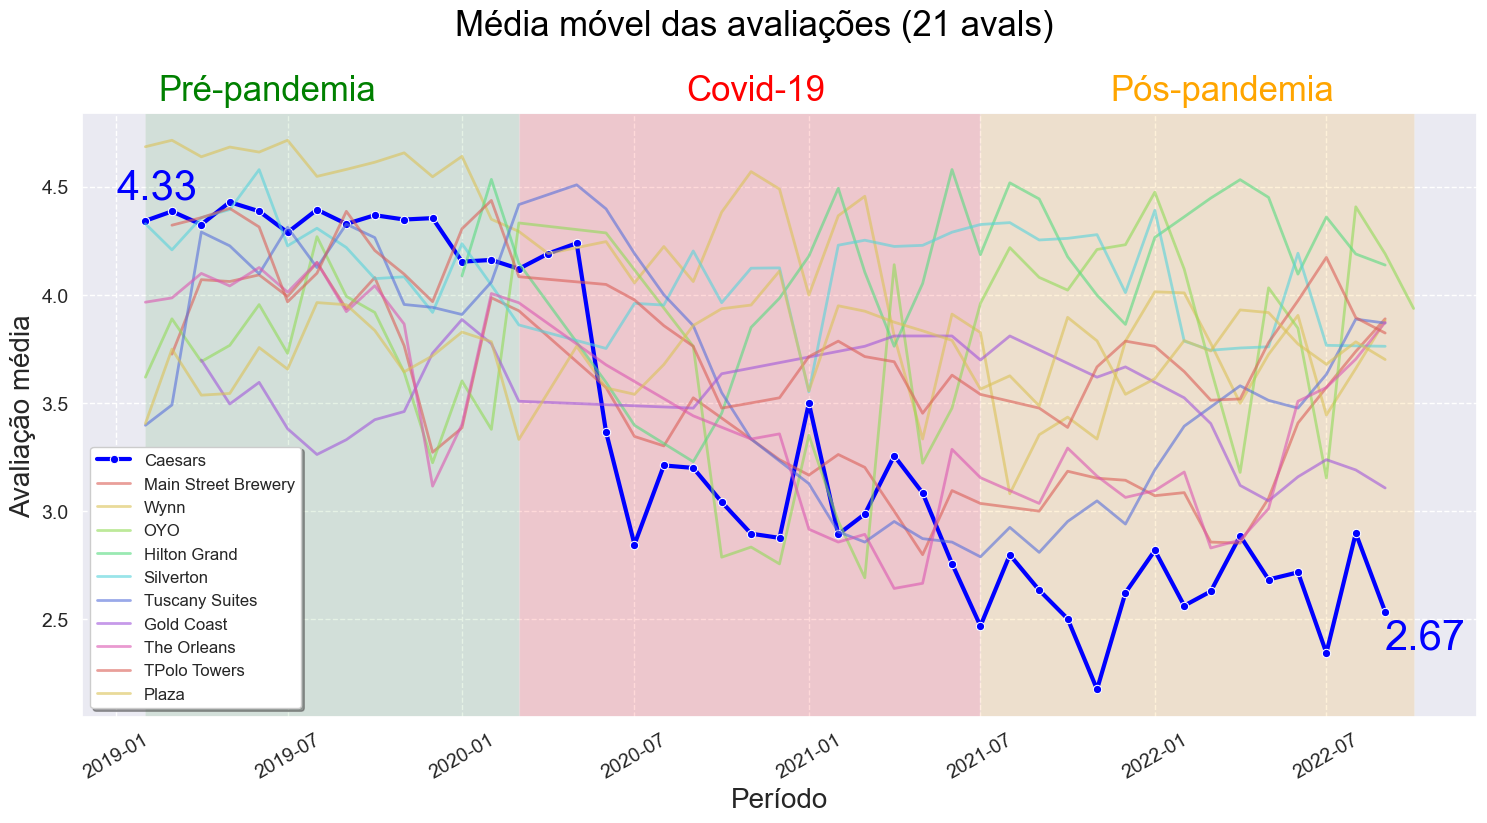

In [1210]:
# Para cada DataFrame, ele cria uma nova coluna, quer será a média corrida de 21 avaliações passadas.

dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11] 
for i in dfs:
    i["media_movel"] = i["Avaliação"].rolling(21).mean()
    i.reset_index(drop= True, inplace=True)


# Aqui o gráfico vai ser construído, com os dados das médias móveis e textos para compor o gráfico.
    
# Determina a cor da cada linha
sns.set_palette(sns.color_palette("hls", 8))

fig, ax = plt.subplots(figsize=(18,8))

plt.xticks(rotation= 30)

# Cria a linha para cada média corrida de cada um dos 11 hotéis
for j,i in enumerate(dfs):
    x = lista[j]
    if j ==0:
        sns.lineplot(x=i["Data"], y=i["media_movel"], label=x, markers=True, marker= "o",
                     linewidth = 3, alpha  = 1, color= "blue", ci=None, markeredgecolor='w')
    else: sns.lineplot(x=i["Data"], y=i["media_movel"], label=lista[j], markers=True,
                       linewidth = 2, alpha  = 0.6, ci=None)


# Textos
plt.text(pd.Timestamp("2019-2-15"), 4.9, 'Pré-pandemia', fontsize=10, color='green', size=25)
plt.text(pd.Timestamp("2020-8-25"), 4.9, 'Covid-19', fontsize=10, color='red', size=25)
plt.text(pd.Timestamp("2021-11-15"), 4.9, 'Pós-pandemia', fontsize=10, color='orange', size=25)
plt.text(pd.Timestamp("2019-12-25"), 5.2, 'Média móvel das avaliações (21 avals)', fontsize=10, color='black', size=25) 

# Min - Max
plt.text(pd.Timestamp("2019-1-1"), df1["media_movel"].iloc[30]+0.3, 
         round(df1["media_movel"].iloc[20],2),color= "blue", size= 30)

plt.text(pd.Timestamp("2022-9-1"), df1["media_movel"].iloc[-1]-0.3,
        round(df1["media_movel"].iloc[-1],2), color= "blue", size= 30)

# Áreas
ax.axvspan(xmin=pd.Timestamp("2019-02-01"), xmax= pd.Timestamp("2020-03-01"), facecolor="green", alpha=0.10) # Pré - Pandemia
ax.axvspan(xmin=pd.Timestamp("2020-03-01"), xmax= pd.Timestamp("2021-07-01"), facecolor="red", alpha=0.15) # Covid
ax.axvspan(xmin=pd.Timestamp("2021-7-01"), xmax= pd.Timestamp("2022-10-01"), facecolor="orange", alpha=0.15) # Pós - Pandemia

plt.rcParams['font.size'] = 20
plt.ylabel("Avaliação média", size= 20)
plt.xlabel("Período", size= 20)
plt.show()

# Análise:

### Logo aqui, podemos ver claramente, pela métrica das avaliações por média corrida de 21 avaliações passadas, uma tendência de queda das avaliações no período, começando em 2019 em 4.33 para 2.67 atualmente

### Além disso, podemos também ver que o fator pandemia afetou em muito nas avaliações. Pois, vindo de uma avaliação superior a 4 pontos, ao chegar a pandemia, esse desenpenho caiu para patamares próximos de 3, e terminando em Mai/2021 em aproximadamente 2.5 pontos.

### No que é apontado como sendo a recuperação no pós pandemia, no caso da Caesars não podemos perceber tendência de melhora. Começando com uma média de 2.5 pontos em Mai/2021, e terminando em 2.67.

# 

<center><h1 style="font-size:30px;">Análise da performance ao longo dos períodos</h1></center> 

In [1211]:
# Aqui será realizada os calculos para cada hotel de sua performance ao longo dos períodos

resultados = pd.DataFrame({"Hotel": [], "Resultado na pandemia (03/2020 - 07/2021)": [],
                           "Resultado pós covid (07/2021 - hoje)": [],
                          "Resultado no periodo (2019 - hoje)": [],})

medias = pd.DataFrame({"Hotel": [], "Media pre": [], "Media COVID": [], "Media pos": []})

for i, hotel in enumerate(dfs):
    
    nome_hotel = lista[i]
    resultado_periodo=  round(hotel["media_movel"].iloc[-1] - hotel["media_movel"].iloc[20],2)
 
    resultado_covid = round(hotel["media_movel"][hotel["Data"] == pd.Timestamp("2021-7-1")].mean() - hotel["media_movel"][hotel["Data"] == pd.Timestamp("2020-3-1")].mean(),2)


    resultado_pos_covid = round(hotel["media_movel"][hotel["Data"] == pd.Timestamp("2022-9-1")].mean() - hotel["media_movel"][hotel["Data"] == pd.Timestamp("2021-7-1")].mean(),2)

    
    media_pre = round(hotel["media_movel"][hotel["Data"] < pd.Timestamp("2020-3-1")].mean(),2)
    media_covid = round(hotel["media_movel"][(hotel["Data"] > pd.Timestamp("2020-3-1")) & (hotel["Data"] < pd.Timestamp("2021-7-1"))].mean(),2)
    media_pos = round(hotel["media_movel"][hotel["Data"] > pd.Timestamp("2021-7-1")].mean(),2)
    
    resultados.loc[len(resultados.index)] = [nome_hotel, resultado_covid, resultado_pos_covid,  resultado_periodo]
    medias.loc[len(medias.index)] = [nome_hotel, media_pre, media_covid, media_pos]

# 

<center><h1 style="font-size:30px;">Gráfico dos resultados na avaliação de cada período</h1></center> 

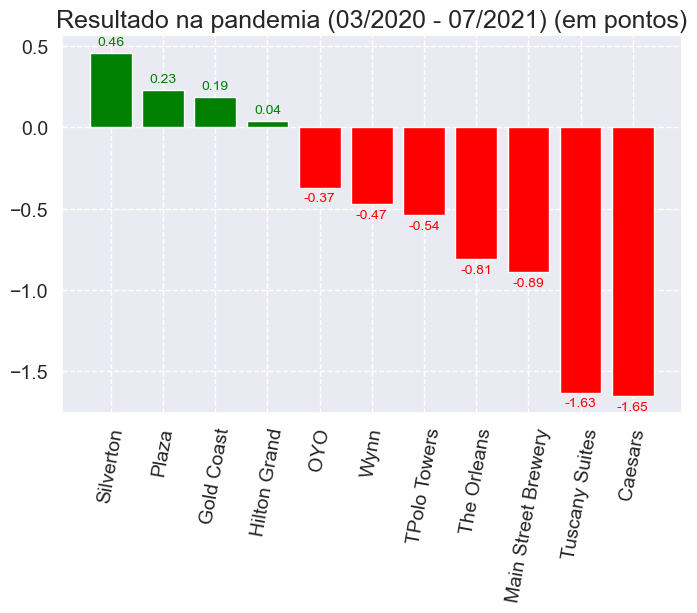

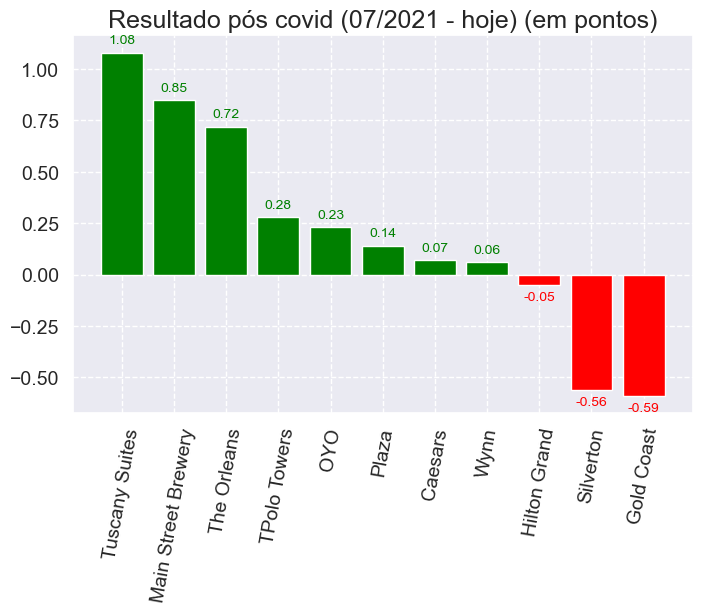

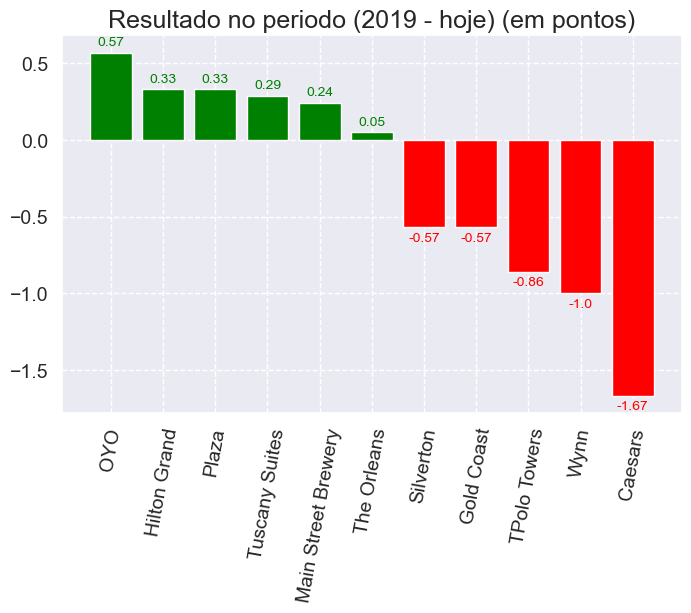

In [1212]:
matplotlib.rcParams.update(andy_theme)

#plt.title("Resultado na pandemia (pontos)", size = 18)
plt.xticks(rotation= 80)

matplotlib.rcParams.update(andy_theme)

for j in ["Resultado na pandemia (03/2020 - 07/2021)", "Resultado pós covid (07/2021 - hoje)", "Resultado no periodo (2019 - hoje)"]:
    
    plt.xticks(rotation= 80)
    
    plt.title(f"{j} (em pontos)", size = 18)
    result_pand = resultados.sort_values(j, ascending = False)
    
    for i in range(0,len(result_pand)):
        if result_pand.iloc[i][j] <= 0:
            plt.bar(result_pand.iloc[i]["Hotel"], result_pand.iloc[i][j], color = "red")
            plt.text(result_pand.iloc[i]["Hotel"],result_pand.iloc[i][j]-0.03, round(result_pand.iloc[i][j],2), size= 10, color = "red", ha='center', va='top')
        else: 
            plt.bar(result_pand.iloc[i]["Hotel"], result_pand.iloc[i][j], color = "green")
            plt.text(result_pand.iloc[i]["Hotel"],result_pand.iloc[i][j]+0.03, round(result_pand.iloc[i][j],2), size= 10, color = "green", ha='center', va='bottom')
    
    
    plt.show()

# Análise:

### Nas tabelas apresentadas, podemos tirar 3 conclusões de posicionamento de Caesers e seus concorrentes:
#### 1) Caesers obteve o pior desempenho na evolução de sua avaliação média ao longo do período de pandemia, perdendo 1.67 pontos, enquanto outros hotéis conseguiram terminar o contexto com saldo positivo, esse foi o caso de Silverton com + 0.46, Plaza com +0.23 e Gold Coast com +0.19.

#### 2) Já no período de recuperação pós covid, Caesars apresentou estabilidade nas avaliações resultadas do covid, ou seja, sua média de avaliação quase não obteve melhora, tendo um saldo de pontuação de +0.07. Comparado aos concorrentes, ela acaba ficando atrás de 6 de 10 deles. Os maiores destaques de recuperação podem ser dados aos hotéis: Tuscany suits com +1.08, Main Street Brewery	com 0.85 e The Orleans com 0.72

#### 3) Em uma visão mais geral do período, podemos afirmar que desde 2019, o hotel Caesars obteve o pior evolução de melhora de seus serviços, refletivo pela avaliação dos clientes no site do Tripadvisor. Nessa vertente, Caesars obteve uma evolução final da média das avaliações de -1.67 pontos. Passando de 4.33 no auge de 2019, para 2.67 em Setembro de 2022. Já, dentro dos concorrentes que melhor performaram nesse período onde tiveram que passar por uma pandemia global, que afetou todo o mundo, é de destaque os hotéis: OYO com +0.57, Plaza e HIlton Grand com +0.33 e Tuscany Suits com 0.29.

# 

<center><h1 style="font-size:30px;"> Colocação quanto à avaliação das médias em cada contexto</h1></center>

,Hotel,Media pre
0,Gold Coast,3.55
1,OYO,3.74
2,Plaza,3.76
3,Main Street Brewery,3.89
4,The Orleans,3.96
5,Tuscany Suites,4.17
6,Silverton,4.25
7,TPolo Towers,4.27
8,Caesars,4.34
9,Hilton Grand,4.36


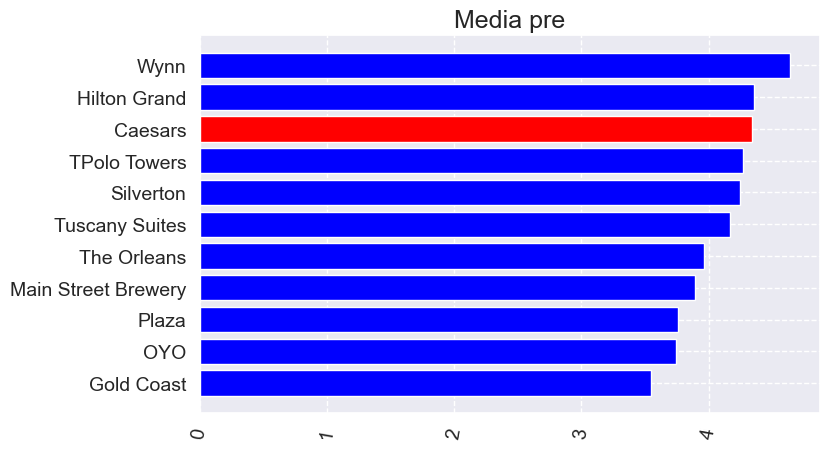

,Hotel,Media COVID
0,Caesars,3.06
1,The Orleans,3.09
2,Main Street Brewery,3.21
3,OYO,3.37
4,Tuscany Suites,3.64
5,TPolo Towers,3.67
6,Gold Coast,3.70
7,Plaza,3.82
8,Hilton Grand,4.10
9,Silverton,4.12


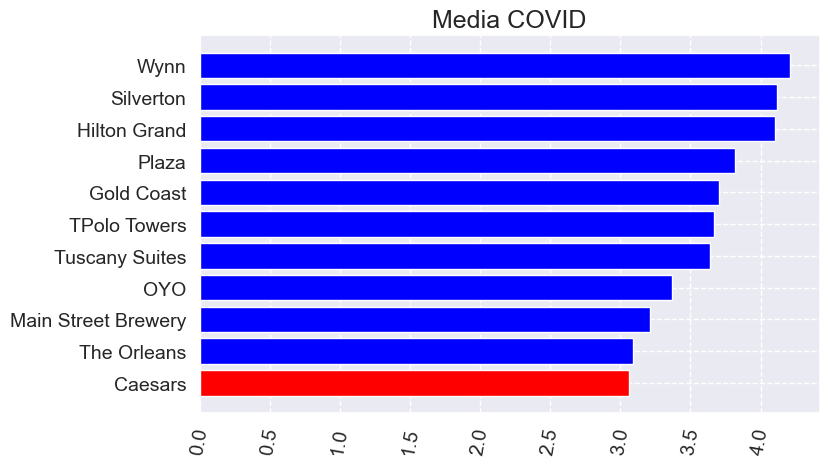

,Hotel,Media pos
0,Caesars,2.63
1,Main Street Brewery,3.17
2,The Orleans,3.20
3,Gold Coast,3.29
4,Tuscany Suites,3.46
5,Wynn,3.62
6,TPolo Towers,3.73
7,Plaza,3.75
8,OYO,3.96
9,Silverton,4.06


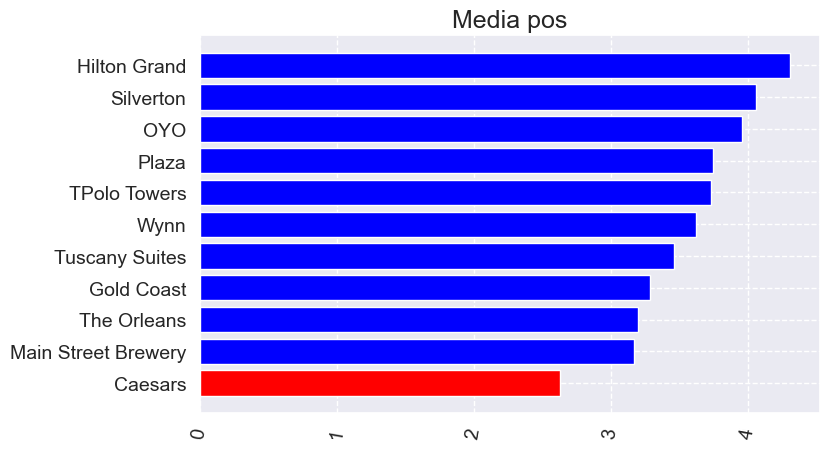

In [1213]:
for j in ["Media pre", "Media COVID", "Media pos"]:
    
    plt.xticks(rotation= 80)
    
    plt.title(f"{j}", size = 18)
    medias_p = medias.sort_values(j, ascending = True)
    medias_p.reset_index(drop=True, inplace= True)
    display(medias_p[["Hotel", j]])
    
    for i in range(len(medias_p)):
        if medias_p["Hotel"].iloc[i] == "Caesars":
            plt.barh(medias_p["Hotel"].iloc[i], medias_p[j].iloc[i], color= "red")
        else: 
            plt.barh(medias_p["Hotel"].iloc[i],medias_p[j].iloc[i], color= "blue")
            
    
    #plt.text(result_pand.iloc[i]["Hotel"],result_pand.iloc[i][j]+0.03, round(result_pand.iloc[i][j],2), size= 10, color = "green", ha='center', va='bottom')
    
    plt.show()

# Análise:

### Analisando esses gráficos, podemos ver que no período pré pandemia, a empresa Caesers era uma das liderantes entre seus peers, possuindo uma média avaliativa de 4.34, e sendo a 3ª mais bem colocada quanto a qualidade frente a seus concorrentes

### Entretanto, seu desempenho na pandemia fez com que sua média avaliativa durante esse período fizesse ela cair de 3ª, para a última (11º) colocada, ficando com uma média de 2.63

### Por fim, Caesars, no pós pandemia acaba por não se recuperar, e ficando ainda mais para trás quando comparado aos seus concorrentes. Continuando em último lugar.